# 0.2 Neutral network classification with PyTorch

classification is a problem of predicting whether something is one thing or another (there can be multiple options)



## 1. Make classification data and get it ready.

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

#Make 1000 sameples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)


In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [5]:
# NMake dataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0], 
                       "X2": X[:,1],
                       "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


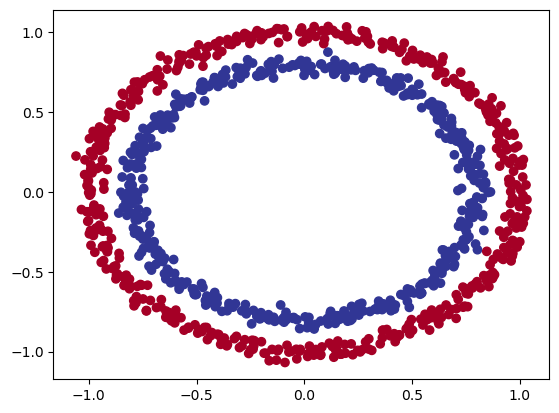

In [6]:
# Visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
           y=X[:,1],
           c=y,
           cmap = plt.cm.RdYlBu);

Note: The data we#re wplromg woth os pftem referred to as a toy dataset, a dataset that is small enough to excperiment but still sizeable enough to practice the fundementals.

### 1.1 Check input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test split

In [9]:
# Turn data into tensors
import torch
torch.__version__

'2.0.0'

In [10]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [11]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [12]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
   1. Setup device agnostic code so our coade will run on an accelerator (GPU) if there is one)
   2. Construct a model(by subclassing `nn.Module`)
   3. Define a loss function and optimizer
   4. Create a training and test loop

In [13]:
# import PyTorch and nn
import torch
from torch import nn

#Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that: 

1. subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target `device`

In [15]:
# 1. construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers of our data
        self.layer_1 = nn.Linear(in_features= 2,
                                out_features= 5)
        self.layer_2 = nn.Linear(in_features= 5,
                                out_features= 1) # Takes in 5 features from previous layerr and outputs a single feature(same shape as y)
    #3. define a forward() method that outlines the forward pass
    def forward(self,x):
        return self.layer_2(self.layer_1(x)) # x--> layer_1 -> layer_2 -> output
    #4. Instantiate an instace of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [17]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6544, -0.1824],
                      [-0.6801, -0.1672],
                      [-0.4629,  0.5955],
                      [ 0.7052,  0.0304],
                      [-0.4549,  0.6308]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6583, -0.1215, -0.1890, -0.5048, -0.4178], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0208, -0.1904, -0.2080, -0.0102, -0.2193]], device='cuda:0')),
             ('1.bias', tensor([0.1215], device='cuda:0'))])

In [19]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f" Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFrist 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labels):\n {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
 Length of test samples: 200, Shape: torch.Size([200, 2])

Frist 10 predictions: 
tensor([[-0.0175],
        [ 0.0471],
        [ 0.1076],
        [-0.0541],
        [ 0.5750],
        [ 0.6108],
        [ 0.4223],
        [ 0.5555],
        [ 0.0877],
        [ 0.0566]], device='cuda:0')

First 10 labels):
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might MAE or MSE (Mean absolute error or mean squarred error)

For classification you might want binary cross entropy or  categorical cross entropy (cross entropy).

As a reminder, the loss function measures how *wrong* your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options

* For the loss function we're going to use `torch.nn.BECWithLogitsLoss()`

In [20]:
# Setup the loss function
loss_fn = nn.BCELoss() #BCELoss = requires inputs to have gone through the sigmoid activation function prior to the BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = Sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

In [21]:
# Calculate accruacy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))* 100
    return acc

## 3. Train model

To train our model we're going to need to build a training loop with the following step:

1. Forward pass
2. calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

our model outpute are going to be raw **logits**.

We can converst these **logits** inot **prediction probabilites** by passiung them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our mode's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [22]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits 

tensor([[-0.0175],
        [ 0.0471],
        [ 0.1076],
        [-0.0541],
        [ 0.5750]], device='cuda:0')

In [23]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [24]:
# Use the sigmoid activation function on our model logits to turn them into prediction propabilites
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4956],
        [0.5118],
        [0.5269],
        [0.4865],
        [0.6399]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:

* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, y=0 (class 0)

In [25]:
# Find the predicted labels 
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze

tensor([True, True, True, True, True], device='cuda:0')


<function Tensor.squeeze>

In [26]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 building a training and testing loop

In [27]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Build training and evaluation loop

for epoch in range (epochs):
    model_0.train()
    
    #1. forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels
    
    #2. Calculate loss/accuracy
    loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss expects raw logits as input
                  y_train)
    acc = accuracy_fn(y_true=y_train,
                     y_pred = y_pred)
    
    # Optimizer zero grad
    optimizer.zero_grad()
    
    #4. Loss backward
    loss.backward()
    
    # Optimizer step(gradient descent)
    optimizer.step()
    
    ### Testing
    model_0.eval()
    with torch.inference_mode():
        #forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        #2. calculate the test loss/acc
        test_loss = loss_fn(test_logits,
                           y_test)
        test_acc = accuracy_fn(y_true=y_test,
                              y_pred=test_pred)
    #Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch:{epoch} | Loss: {loss}.5f, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch:0 | Loss: 0.7111942172050476.5f, Acc: 53.62% | Test loss: 0.70632, Test acc: 55.00%


### 4. Make predictions and evaluate the model

from metrics it looks like our model isn't learning anything..

So to inspect it let's make some predictions and make them visual!

To do so, we're going to import a function called `plot_decision_boundary()`

In [28]:
import requests
from pathlib import Path

#Download helper funtions from learn PyTorch repo
if Path("helper_function.py").is_file():
    print("helper_function.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
        
    from helper_functions import plot_predictions, plot_decision_boundary

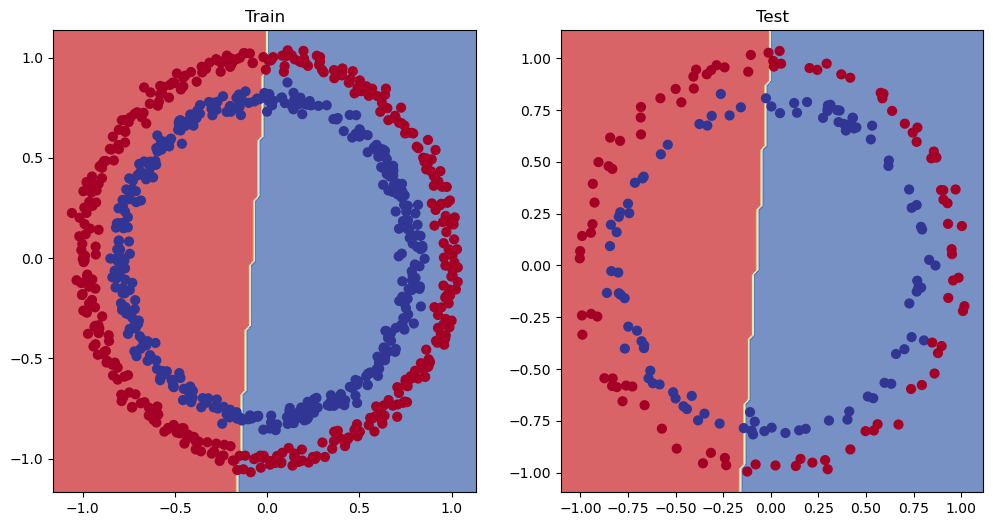

In [29]:
 # Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation function
* Change the learning rate
* Change the loss function

These options are all from a model's perpective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are reffered to as **Hyperparameters**

In [30]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x):
#         z = self.layer_1(x)
#         z = self.layer_2(z)
#         z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x))) # This way of writing operations leverages speed ups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [31]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()
# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                           lr = 0.1)

In [32]:
#Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device),y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train()
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    #2. calculate the loss/acc
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                     y_pred=y_pred)
    #3 Optimizer zero grad
    optimizer.zero_grad()
    
    loss.backward()
    
    #5. optimizer step
    optimizer.step()
    
    ###Testing
    model_1.eval()
    with torch.inference_mode():
        #forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        #calculate loss
        test_loss = loss_fn(test_logits,
                           y_test)
        test_acc = accuracy_fn(y_true = y_test,
                              y_pred = test_pred)
    
    #Print out wahat's happening
    if epoch % 100 ==0:
        print(f"Epoch: {epoch}| Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, test acc: {test_acc:.2f}%")

Epoch: 0| Loss: 0.69396, Acc: 50.88% | Test loss: 0.69261, test acc: 51.00%
Epoch: 100| Loss: 0.69305, Acc: 50.38% | Test loss: 0.69379, test acc: 48.00%
Epoch: 200| Loss: 0.69299, Acc: 51.12% | Test loss: 0.69437, test acc: 46.00%
Epoch: 300| Loss: 0.69298, Acc: 51.62% | Test loss: 0.69458, test acc: 45.00%
Epoch: 400| Loss: 0.69298, Acc: 51.12% | Test loss: 0.69465, test acc: 46.00%
Epoch: 500| Loss: 0.69298, Acc: 51.00% | Test loss: 0.69467, test acc: 46.00%
Epoch: 600| Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, test acc: 46.00%
Epoch: 700| Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, test acc: 46.00%
Epoch: 800| Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, test acc: 46.00%
Epoch: 900| Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, test acc: 46.00%


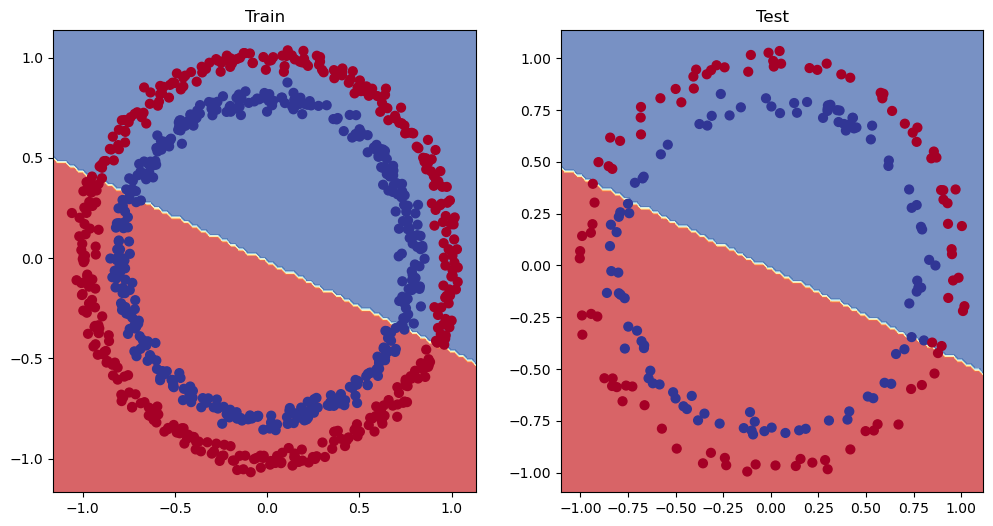

In [33]:
# Plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to trouleshoot to a larget problem is to test out a smaller problem

In [34]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

#Create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [35]:
#Create train and test splits
train_split = int(0.8* len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression [train_split:]

#Cehck the legnths

len(X_train_regression), len(X_test_regression), len(y_test_regression), len(y_train_regression)

(80, 20, 20, 80)

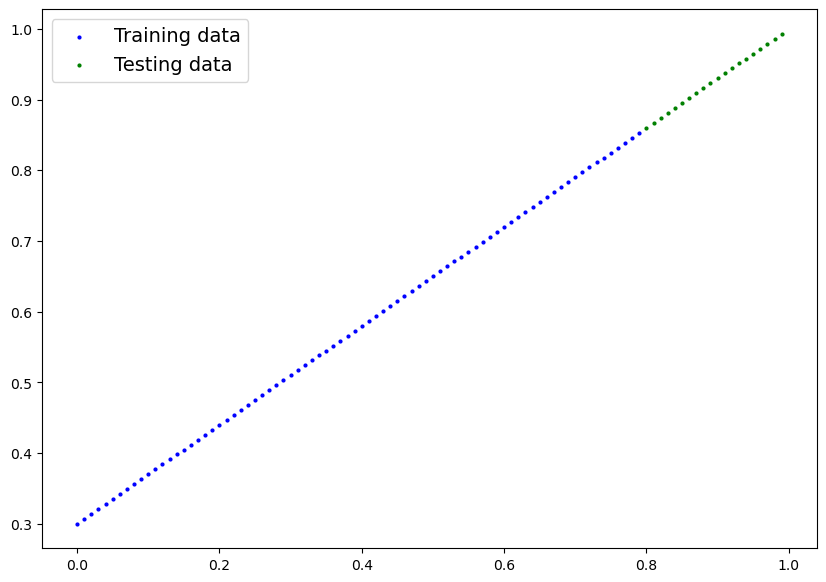

In [36]:
plot_predictions(train_data=X_train_regression,
                train_labels = y_train_regression,
                test_data = X_test_regression,
                test_labels = y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line


In [37]:
#Same architecture as model_1 (but susing nn.sequential())

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features= 10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [38]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                           lr=0.01)

In [39]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
        
    if epoch % 100 == 0:
        print(f"Epochs: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epochs: 0 | Loss: 0.75986 | Test loss: 0.91103
Epochs: 100 | Loss: 0.02858 | Test loss: 0.00081
Epochs: 200 | Loss: 0.02533 | Test loss: 0.00209
Epochs: 300 | Loss: 0.02137 | Test loss: 0.00305
Epochs: 400 | Loss: 0.01964 | Test loss: 0.00341
Epochs: 500 | Loss: 0.01940 | Test loss: 0.00387
Epochs: 600 | Loss: 0.01903 | Test loss: 0.00379
Epochs: 700 | Loss: 0.01878 | Test loss: 0.00381
Epochs: 800 | Loss: 0.01840 | Test loss: 0.00329
Epochs: 900 | Loss: 0.01798 | Test loss: 0.00360


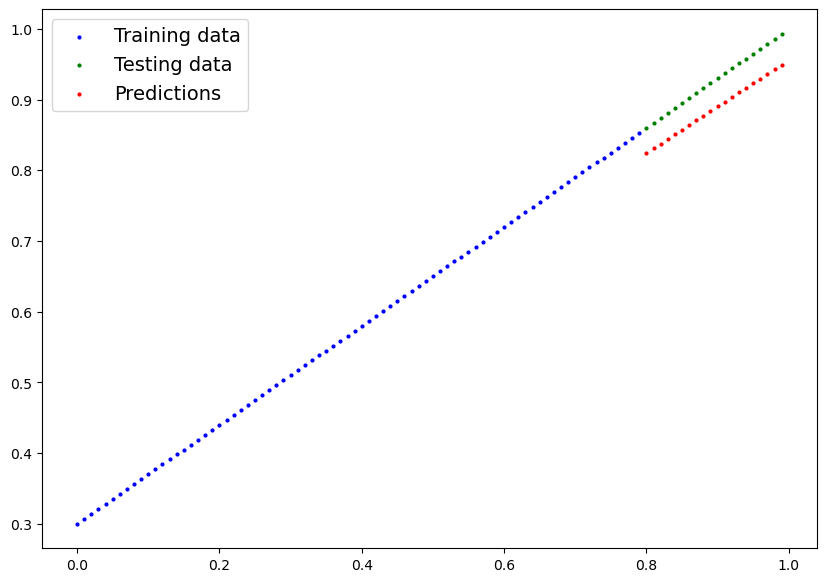

In [40]:
#' Turn on evaluiation mode
model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(),
                train_labels = y_train_regression.cpu(),
                test_data = X_test_regression.cpu(),
                test_labels = y_test_regression.cpu(),
                predictions= y_preds.cpu());

## 6. The missing piece: non-linearity

What patterns could you draw if you were given an infinite amount of straight and non-straight lines?

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

## 6.1 Recreating non-linear data (red and blue circles)

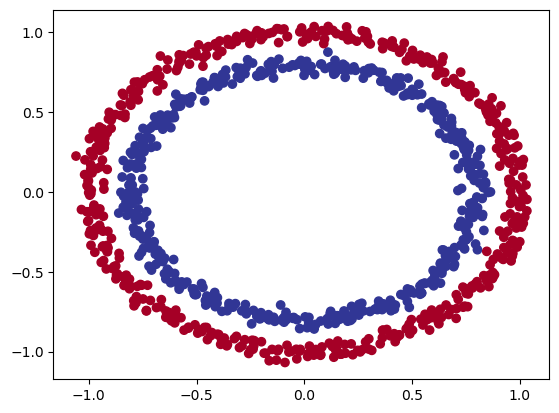

In [41]:
#Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X ,y = make_circles(n_samples,
                   noise= 0.03,
                   random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y ,cmap=plt.cm.RdYlBu);

In [42]:
# convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#Split training and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)



In [1]:
X_train[:5], y_train[:5], X_train.shape

NameError: name 'X_train' is not defined

### 6.2 Building a model with non_linearity

* Linear = straight line
* Non-linear = non-straight lines

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are ptentially able to find patterns in data.

In [44]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        #Where should we put our non-linear activation functions?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [45]:
# Setup loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                           lr=0.1)


In [46]:
len(X_test), len(y_test)

(200, 200)

## 6.3 Training a model with non-linearity

In [47]:
#Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1600

for epoch in range (epochs):
    model_3.train()
    
    #forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    #calculate the loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    #Optimizer
    optimizer.zero_grad()
    
    #Loss backward
    loss.backward()
    
    #Optimizer
    optimizer.step()
    
    ### Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits= model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                              y_pred=test_pred)
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, | acc: {acc:.2f}% | test loss: {test_loss:.4f}, test_acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6929, | acc: 50.00% | test loss: 0.6932, test_acc: 50.00%
Epoch: 100 | Loss: 0.6912, | acc: 52.88% | test loss: 0.6910, test_acc: 52.50%
Epoch: 200 | Loss: 0.6898, | acc: 53.37% | test loss: 0.6894, test_acc: 55.00%
Epoch: 300 | Loss: 0.6879, | acc: 53.00% | test loss: 0.6872, test_acc: 56.00%
Epoch: 400 | Loss: 0.6852, | acc: 52.75% | test loss: 0.6841, test_acc: 56.50%
Epoch: 500 | Loss: 0.6810, | acc: 52.75% | test loss: 0.6794, test_acc: 56.50%
Epoch: 600 | Loss: 0.6751, | acc: 54.50% | test loss: 0.6729, test_acc: 56.00%
Epoch: 700 | Loss: 0.6666, | acc: 58.38% | test loss: 0.6632, test_acc: 59.00%
Epoch: 800 | Loss: 0.6516, | acc: 64.00% | test loss: 0.6476, test_acc: 67.50%
Epoch: 900 | Loss: 0.6236, | acc: 74.00% | test loss: 0.6215, test_acc: 79.00%
Epoch: 1000 | Loss: 0.5682, | acc: 87.75% | test loss: 0.5738, test_acc: 86.50%
Epoch: 1100 | Loss: 0.4815, | acc: 93.50% | test loss: 0.4993, test_acc: 90.50%
Epoch: 1200 | Loss: 0.3706, | acc: 97.75% | test los

In [48]:
len(X_test), len(y_test), len(X_train), len(y_train)

(200, 200, 800, 800)

### 6.4 Evaluating a model trained with non-linear activation functions

In [49]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds [:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

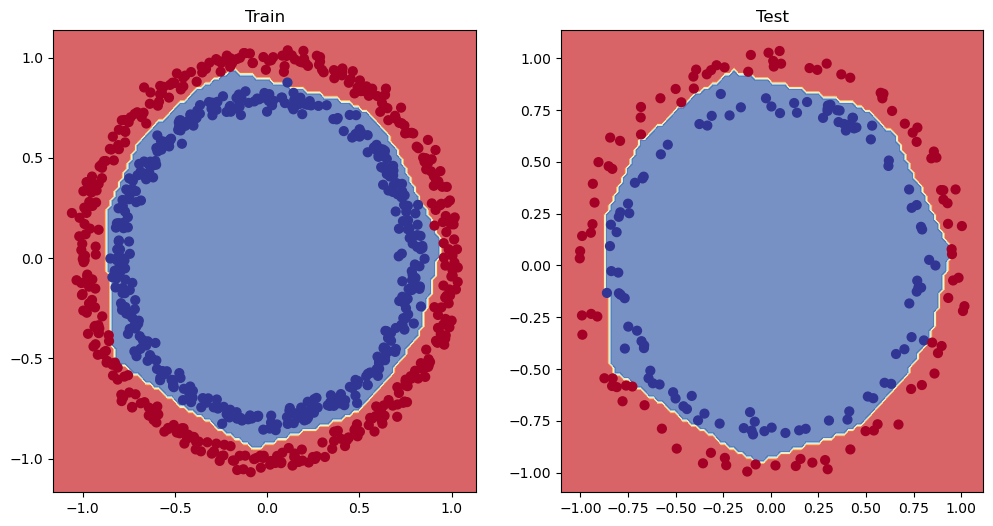

In [50]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [51]:
#Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

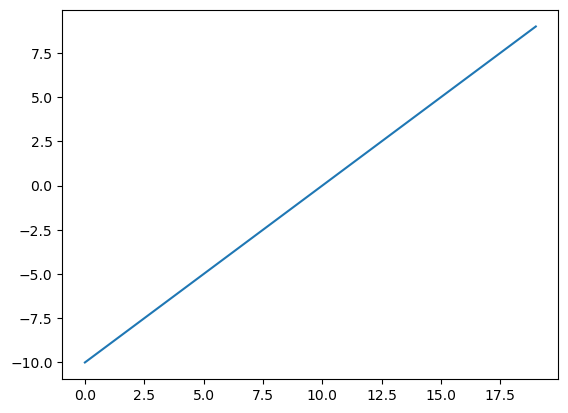

In [52]:
# Visualize the tensor
plt.plot(A);

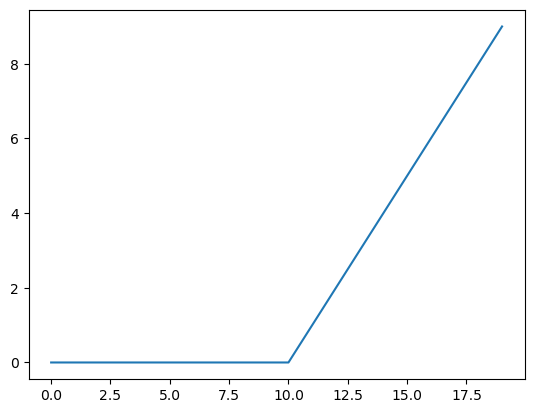

In [53]:
plt.plot(torch.relu(A));

In [54]:
def relu(x: torch.Tensor)-> torch.Tensor:
    return torch.maximum(torch.tensor(0), x) #inputs must be tensors

In [55]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

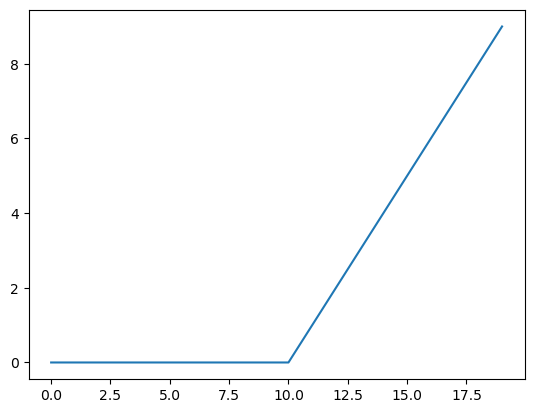

In [56]:
# plot ReLU activation function
plt.plot(relu(A));

In [57]:
# Now let's do the same for sigmoid
def sigmoid(x):
    return 1/(1+torch.exp(-x))

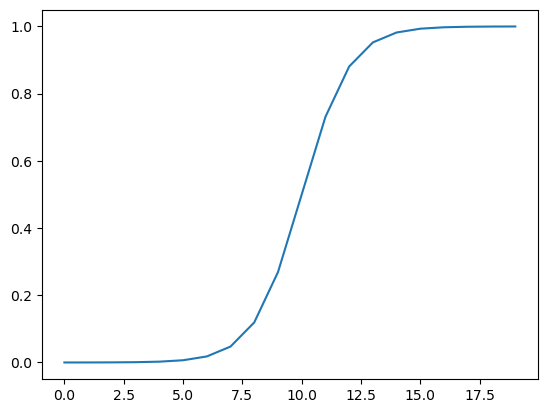

In [58]:
plt.plot(torch.sigmoid(A));

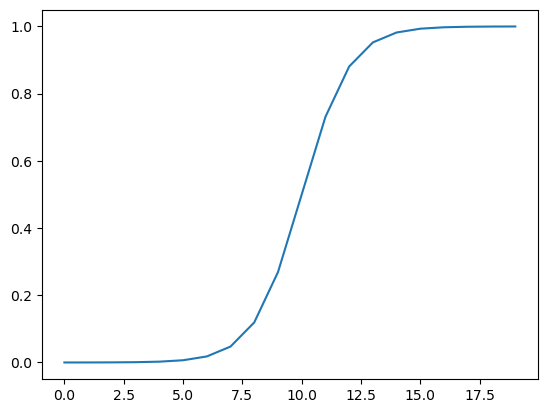

In [59]:
plt.plot(sigmoid(A));

## 8. Putting it all together: with a multi-class classification problem

* Binary classification = one thing or another (cat vs. dog, spam vs. not span, fraud or not fraud)
* Multi-class classification = more than one thing or another(cat vs. dog vs. chicken)

### 8.1 Creating a toy multi-class dataset

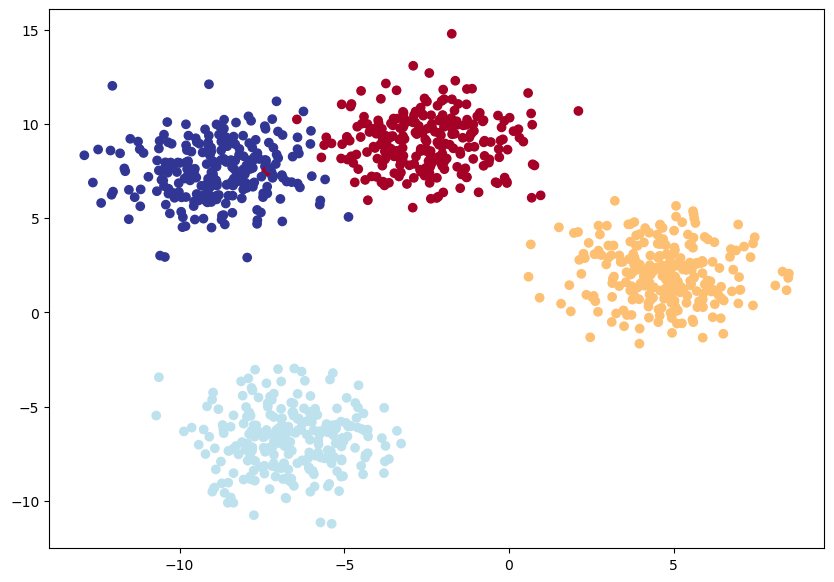

In [60]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyperparameters from the data creation
NUM_ClASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                           n_features=NUM_FEATURES,
                           centers=NUM_ClASSES,
                           cluster_std=1.5,
                           random_state=RANDOM_SEED)

#2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

#3 Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                       y_blob,
                                                                       test_size= 0.2,
                                                                       random_state=RANDOM_SEED)
#4. plot  data(visualize)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 Bulding a multi-class classification model in PyTorch

In [61]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [62]:
#Build a multi-class classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes multi-class classification model.
        
        Args:
        input_features (int): number of input features to the model
        output_features (int): Number of outputs features (number of output classes)
        hidden_units (int): number of hidden units between layers, default8
        
        Returns:
        """
        super().__init__()
        self.linear_layer_stack= nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
        )
    def forward(self, x):
        return self.linear_layer_stack(x)

    
#Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                   output_features=4,
                   hidden_units=8).to(device)

In [63]:
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [64]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

#Create an optimizer for a multi-class classification
optimizer= torch.optim.SGD(params=model_4.parameters(),
                          lr=0.1)

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels

Logits( raw output of the model) -> Pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probabilities

In [65]:
#Let's get some raw outputs of our model
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [66]:
# Conver our model's logit outputs to prediction probabilites
y_pred_probs = torch.softmax(y_logits, dim = 1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [67]:
# Covert our model's prediction proabbilities inot prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [68]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [69]:
y_logits.dtype

torch.float32

### 8.5 Creating a training loop and testing loop for a multi-class PyTorch model

In [70]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

#Put the data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ###TRaining
    model_4.train()
    
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                     y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    ###Testing
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
        
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test,
                              y_pred = test_preds)
    #print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.1588, Acc: 40.38% | Test loss: 1.0755, Test acc: 48.00%
Epoch: 10 | Loss: 0.6448, Acc: 96.75% | Test loss: 0.6607, Test acc: 97.50%
Epoch: 20 | Loss: 0.4254, Acc: 98.50% | Test loss: 0.4307, Test acc: 100.00%
Epoch: 30 | Loss: 0.2529, Acc: 99.12% | Test loss: 0.2451, Test acc: 99.50%
Epoch: 40 | Loss: 0.1123, Acc: 99.25% | Test loss: 0.1023, Test acc: 99.50%
Epoch: 50 | Loss: 0.0663, Acc: 99.25% | Test loss: 0.0585, Test acc: 99.50%
Epoch: 60 | Loss: 0.0507, Acc: 99.25% | Test loss: 0.0429, Test acc: 99.50%
Epoch: 70 | Loss: 0.0430, Acc: 99.25% | Test loss: 0.0349, Test acc: 99.50%
Epoch: 80 | Loss: 0.0384, Acc: 99.25% | Test loss: 0.0299, Test acc: 99.50%
Epoch: 90 | Loss: 0.0352, Acc: 99.25% | Test loss: 0.0266, Test acc: 99.50%


### 8.6 Making and evaluating prediction with a PyTorch multi-class model

In [71]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    
# View the first 10 predictions
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]], device='cuda:0')

In [72]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5998e-05, 2.7210e-04]], device='cuda:0')

In [73]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

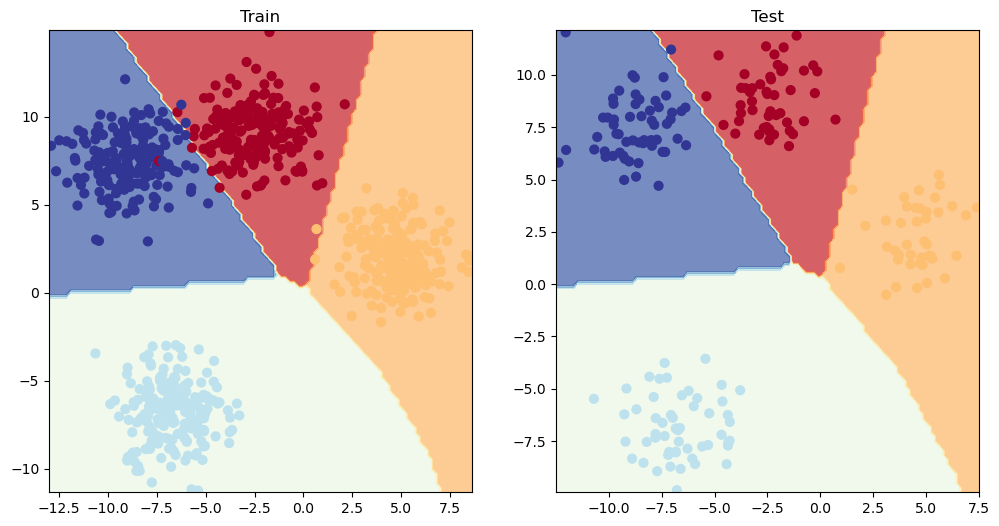

In [74]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics (to evaluate our classification model)

* Accuracy - out of 100 samples how many does our model get right?
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

In [5]:
from torchmetrics import Accuracy

#Setup metric
torch_accuracy = Accuracy()

#calculate accuracy
torch_accuracy(y_preds, y_blob_test)

TypeError: Accuracy.__new__() missing 1 required positional argument: 'task'